# Data Processing

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import pickle as pk

import re

from jupyterthemes import jtplot
jtplot.style(figsize=(15, 9))

## Data

In [2]:
# US identified serial killers from Wikipedia

us_sk_id = pd.read_csv('data/serial_killers_identified_RAW.csv', index_col=0)
us_sk_id.head()

,Name,Years active,Proven Victims,Possible Victims,Status,Notes,Ref
0,"Ables, Tony",1970–1990,4,4+,Sentenced to death; commuted to life imprisonment,"Murdered robbery victim in 1970, and at least ...",[4]
1,"Acevedo, Francisco",1989–1996,3,3,Sentenced to 75 years to life,Strangled three prostitutes in New York betwee...,[5]
2,"Adams, Edward James",1920–1921,7,7,Killed by police during shootout,"Murdered seven people, including three policemen",[6]
3,"Agrue, John",1966–1982,3,3+,Died in 2009,Killed his sister-in-law in Illinois; paroled ...,[7]
4,"Albanese, Charles",1980–1981,3,3,Executed 1995,Poisoned family members with arsenic in Fox La...,[8]


In [3]:
# US unidentified serial killers from Wikipedia

us_sk_unid = pd.read_csv('data/serial_killers_unidentified_RAW.csv', index_col=0)
us_sk_unid.head()

,Name,Years active,Proven Victims,Possible Victims,Region where active,Notes,Ref
0,Albuquerque serial killer,2021–2022,2,4,NM,Suspected of killing four Muslim men in drive-...,[786]
1,Alphabet murders,1971–1973,3,3,NY,"Also known as the ""Double Initial Murders""; mu...",[787]
2,Ann Arbor Hospital murders,1975,10,10,MI,Poisonings of 10 patients at the Veteran's Adm...,[788][789]
3,Atlanta child murders,1979–1981,28,30,GA,"A series of murders committed in Atlanta, Geor...",NaN
4,Atlanta Lover's Lane Murders,1977,3,3,GA,A series of unsolved shootings on couples in A...,NaN


In [4]:
us_sk_id.drop('Ref', inplace=True, axis=1)
us_sk_unid.drop('Ref', inplace=True, axis=1)

In [5]:
us_sk_id['Location'] = np.nan
us_sk_unid['Location'] = np.nan

In [6]:
with open('data/US_states_and_cities.pickle', 'rb') as f:
    US = pk.load(f)

In [7]:
def find_location(row):
    result = []
    for state in US.keys():
        location = []
        if state in row:
            location.append(state)
            c = ''
            for city in US[state]:
                if 'Saint' in city:
                    city = city.replace('Saint', 'St.')
                if city in row:
                    c = city
            location.append(c)
        if location:
            result.append(location)
    return result



In [8]:
us_sk_id['Location']   = us_sk_id['Notes'].apply(find_location)
us_sk_unid['Location'] = us_sk_unid['Notes'].apply(find_location)

In [9]:
us_sk_id.head()

,Name,Years active,Proven Victims,Possible Victims,Status,Notes,Location
0,"Ables, Tony",1970–1990,4,4+,Sentenced to death; commuted to life imprisonment,"Murdered robbery victim in 1970, and at least ...","[[Florida, St. Petersburg]]"
1,"Acevedo, Francisco",1989–1996,3,3,Sentenced to 75 years to life,Strangled three prostitutes in New York betwee...,"[[New York, ]]"
2,"Adams, Edward James",1920–1921,7,7,Killed by police during shootout,"Murdered seven people, including three policemen",[]
3,"Agrue, John",1966–1982,3,3+,Died in 2009,Killed his sister-in-law in Illinois; paroled ...,"[[Colorado, ], [Illinois, ]]"
4,"Albanese, Charles",1980–1981,3,3,Executed 1995,Poisoned family members with arsenic in Fox La...,"[[Illinois, ]]"


In [10]:
us_sk_id.loc[3]['Location'][0][0]

'Colorado'

In [11]:
us_sk_unid.head()

,Name,Years active,Proven Victims,Possible Victims,Region where active,Notes,Location
0,Albuquerque serial killer,2021–2022,2,4,NM,Suspected of killing four Muslim men in drive-...,[]
1,Alphabet murders,1971–1973,3,3,NY,"Also known as the ""Double Initial Murders""; mu...","[[New York, Rochester]]"
2,Ann Arbor Hospital murders,1975,10,10,MI,Poisonings of 10 patients at the Veteran's Adm...,[]
3,Atlanta child murders,1979–1981,28,30,GA,"A series of murders committed in Atlanta, Geor...","[[Georgia, Atlanta]]"
4,Atlanta Lover's Lane Murders,1977,3,3,GA,A series of unsolved shootings on couples in A...,[]


In [12]:
us_sk_unid.loc[3]['Location'][0][1]

'Atlanta'

In [13]:
us_sk_id.to_csv('data/serial_killers_identified_LOCATION.csv')
us_sk_unid.to_csv('data/serial_killers_unidentified_LOCATION.csv')

In [14]:
us_sk_id = pd.read_csv('data/serial_killers_identified_LOCATION.csv', index_col=0, converters={'Location': pd.eval})
us_sk_unid = pd.read_csv('data/serial_killers_unidentified_LOCATION.csv', index_col=0, converters={'Location': pd.eval})

In [15]:
def define_years(df):
    for i in range(len(df)):
        years = df.loc[i, 'Years active'].split('–')
        if len(years) < 2:
            years.append(np.nan)
        df.loc[i, ['Start Year', 'Year End']] = years

In [16]:
define_years(us_sk_id)
define_years(us_sk_unid)

In [17]:
us_sk_unid.head()

,Name,Years active,Proven Victims,Possible Victims,Region where active,Notes,Location,Start Year,Year End
0,Albuquerque serial killer,2021–2022,2,4,NM,Suspected of killing four Muslim men in drive-...,[],2021,2022
1,Alphabet murders,1971–1973,3,3,NY,"Also known as the ""Double Initial Murders""; mu...","[[New York, Rochester]]",1971,1973
2,Ann Arbor Hospital murders,1975,10,10,MI,Poisonings of 10 patients at the Veteran's Adm...,[],1975,NaN
3,Atlanta child murders,1979–1981,28,30,GA,"A series of murders committed in Atlanta, Geor...","[[Georgia, Atlanta]]",1979,1981
4,Atlanta Lover's Lane Murders,1977,3,3,GA,A series of unsolved shootings on couples in A...,[],1977,NaN


In [18]:
us_sk_id.head()

,Name,Years active,Proven Victims,Possible Victims,Status,Notes,Location,Start Year,Year End
0,"Ables, Tony",1970–1990,4,4+,Sentenced to death; commuted to life imprisonment,"Murdered robbery victim in 1970, and at least ...","[[Florida, St. Petersburg]]",1970,1990
1,"Acevedo, Francisco",1989–1996,3,3,Sentenced to 75 years to life,Strangled three prostitutes in New York betwee...,"[[New York, ]]",1989,1996
2,"Adams, Edward James",1920–1921,7,7,Killed by police during shootout,"Murdered seven people, including three policemen",[],1920,1921
3,"Agrue, John",1966–1982,3,3+,Died in 2009,Killed his sister-in-law in Illinois; paroled ...,"[[Colorado, ], [Illinois, ]]",1966,1982
4,"Albanese, Charles",1980–1981,3,3,Executed 1995,Poisoned family members with arsenic in Fox La...,"[[Illinois, ]]",1980,1981


In [19]:
us_sk_id.dtypes

Name                object
Years active        object
Proven Victims      object
Possible Victims    object
Status              object
Notes               object
Location            object
Start Year          object
Year End            object
dtype: object

In [147]:
# us_sk_id['Start Year'] = pd.to_numeric(us_sk_id['Start Year'], downcast='integer', errors='coerce')
# us_sk_id['Year End'] = pd.to_numeric(us_sk_id['Year End'], downcast='integer', errors='coerce')

In [22]:
# us_sk_unid[[27, 30, 64, 68], ['Start Year', 'Year End']]

In [21]:
us_sk_id[~us_sk_id.index.isin([102, 116, 150, 188, 231, 291, 370, 386, 539, 557])]

,Name,Years active,Proven Victims,Possible Victims,Status,Notes,Location,Start Year,Year End
0,"Ables, Tony",1970–1990,4,4+,Sentenced to death; commuted to life imprisonment,"Murdered robbery victim in 1970, and at least ...","[[Florida, St. Petersburg]]",1970,1990
1,"Acevedo, Francisco",1989–1996,3,3,Sentenced to 75 years to life,Strangled three prostitutes in New York betwee...,"[[New York, ]]",1989,1996
2,"Adams, Edward James",1920–1921,7,7,Killed by police during shootout,"Murdered seven people, including three policemen",[],1920,1921
3,"Agrue, John",1966–1982,3,3+,Died in 2009,Killed his sister-in-law in Illinois; paroled ...,"[[Colorado, ], [Illinois, ]]",1966,1982
4,"Albanese, Charles",1980–1981,3,3,Executed 1995,Poisoned family members with arsenic in Fox La...,"[[Illinois, ]]",1980,1981
...,...,...,...,...,...,...,...,...,...
715,"Wooten, Charles",1969–1993,3,3,Sentenced to life imprisonment,Killed two gas station attendants in Fort Wort...,[],1969,1993
716,"Wright, Douglas Franklin",1969–1991,7,7+,Executed 1996,First criminal executed by lethal injection in...,"[[Oregon, ]]",1969,1991
717,"Wuornos, Aileen",1989–1990,7,7,Executed 2002,"Known as the ""Damsel of Death""; shot seven men...","[[Florida, ]]",1989,1990
718,"Yates, Robert Lee",1975–1998,13,18+,Sentenced to death; commuted to life imprisonment,"Targeted women in and around Spokane, Washington","[[Washington, Spokane]]",1975,1998


In [23]:
us_sk_id['Proven Victims INT'] = pd.to_numeric(us_sk_id['Proven Victims'], errors='coerce', downcast='integer')

In [24]:
# us_sk_id['Proven Victims INT'].astype(int)

In [25]:
us_sk_id.dtypes

Name                   object
Years active           object
Proven Victims         object
Possible Victims       object
Status                 object
Notes                  object
Location               object
Start Year             object
Year End               object
Proven Victims INT    float64
dtype: object

In [26]:
us_sk_id[us_sk_id['Proven Victims INT']>=28]

,Name,Years active,Proven Victims,Possible Victims,Status,Notes,Location,Start Year,Year End,Proven Victims INT
86,"Bundy, Ted",1971–1978,28,30+,Executed 1989,Preyed on young white women throughout the Uni...,[],1971,1978,28.0
141,"Corll, Dean",1970–1973,28,28+,Killed by accomplice Elmer Wayne Henley,"Known as ""The Candy Man"" and ""The Pied Piper""....","[[Texas, Houston]]",1970,1973,28.0
199,"Espinosa, Felipe",1863,32,32,Killed by Tom Tobin,Murdered various people across the Colorado Te...,"[[Colorado, ]]",1863,NaN,32.0
227,"Gacy, John Wayne",1972–1978,33,33+,Executed 1994,"Known as ""The Killer Clown""; preyed on young m...",[],1972,1978,33.0
261,"Gosnell, Kermit Barron",1998–2009,48,200+,Sentenced to life imprisonment,Philadelphia physician who killed healthy newb...,[],1998,2009,48.0
296,Harpe Brothers,1797–1804,39,50+,Lynched 1799 (Micajah)Executed 1804 (Wiley),Brothers or cousins; America's first known ser...,[],1797,1804,39.0
303,"Harvey, Donald",1970–1987,37,80,Sentenced to three concurrent terms of life in...,"Known as ""The Angel of Death""; hospital orderl...","[[Kentucky, ], [Ohio, Kent]]",1970,1987,37.0
426,"Little, Samuel",1970–2005,61,93+,Died in prison,"Known as ""The Choke-and-Stroke Killer""; transi...",[],1970,2005,61.0
564,"Ridgway, Gary",1982–1998,49,90+,Sentenced to life imprisonment,"Known as ""The Green River Killer""; targeted se...","[[Washington, ]]",1982,1998,49.0


In [27]:
proven_victims_count = us_sk_id.groupby('Proven Victims INT').count()

In [28]:
proven_victims_count

,Name,Years active,Proven Victims,Possible Victims,Status,Notes,Location,Start Year,Year End
Proven Victims INT,,,,,,,,,
0.0,2,2,2,2,2,2,2,2,1
1.0,9,9,9,9,9,9,9,9,7
2.0,49,49,49,49,49,49,49,49,40
3.0,220,220,220,220,220,220,220,220,178
4.0,138,138,138,138,138,138,138,138,111
5.0,83,83,83,83,83,83,83,83,68
6.0,48,48,48,48,48,48,48,48,42
7.0,36,36,36,36,36,36,36,36,28
8.0,26,26,26,26,26,26,26,26,22


<AxesSubplot:xlabel='Proven Victims', ylabel='Density'>

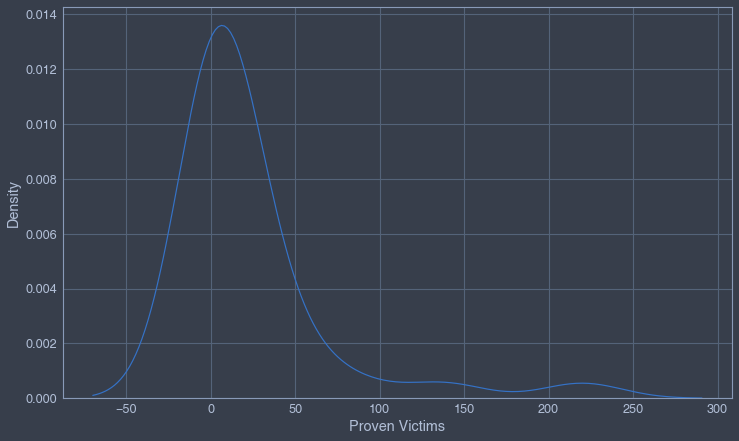

In [52]:
sns.kdeplot(data=proven_victims_count, x='Proven Victims')

(array([0., 9., 4., 2., 1., 0., 2., 0., 1., 1., 0., 0., 1., 2., 0., 0., 0.,
        0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 15., 16., 17., 18., 20., 21., 22., 23., 25., 28., 32., 33.,
        37., 39., 48., 49., 61.]),
 <BarContainer object of 30 artists>)

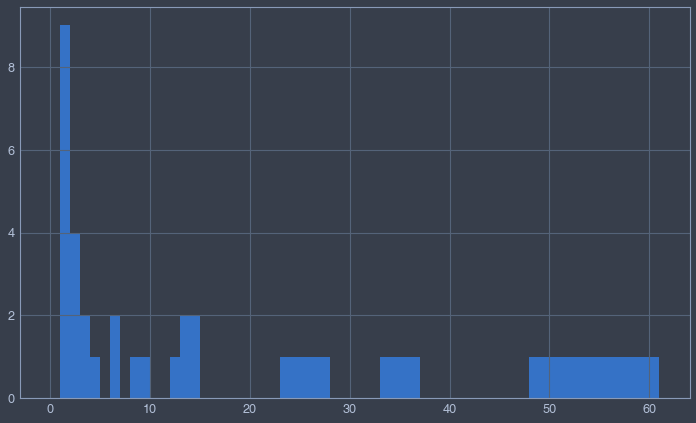

In [60]:
plt.hist(proven_victims_count['Proven Victims'], proven_victims_count.index)

In [29]:
unid_proven_victims_count = us_sk_unid.groupby('Proven Victims').count()

In [14]:
us_sk_unid[us_sk_unid['Proven Victims']==6]

,Name,Years active,Proven Victims,Possible Victims,Region where active,Notes,Location,Start Year,Year End
6,Axeman of New Orleans,1918–1919,6,6,LA,Responsible for the deaths of six or seven peo...,[],1918,1919
7,Bag murders,1975–1977,6,6,NY,Murders and dismemberment of gay men in Lower ...,[],1975,1977
10,Bouncing Ball Killer,1959–1960,6,7+,CA,Series of murders targeted towards elderly wom...,[],1959,1960
21,Dayton Strangler,1900–1909,6,6,OH,"Murdered five women and one man in Dayton, Ohi...","[[Ohio, Dayton]]",1900,1909
24,Doodler,1974–1975,6,16,CA,Sketched then stabbed to death gay men in San ...,"[[California, San Francisco]]",1974,1975
32,Freeway Phantom,1971–1972,6,6,DC,Raped and strangled six young women and girls ...,"[[Washington, ]]",1971,1972
37,Hog Trail Murders,1993–1996,6,12,FL,Mutilated bodies of young men found in Charlot...,"[[Florida, ]]",1993,1996
41,I-70 killer,1992–2001,6,9,"IN, MO, KSTX (suspected)",Killed and robbed six store clerks around the ...,[],1992,2001
57,1996 Raleigh murders,1996,6,6,NC,Series of murders and rapes across the Raleigh...,"[[North Carolina, Raleigh]]",1996,NaN
66,Stockton serial shootings,2021–2022,6,7+,CA,Shot one man to death in Oakland and five in S...,[],2021,2022


In [63]:
unid_proven_victims_count

,Name,Years active,Possible Victims,Region where active,Notes,Location,Start Year,Year End
Proven Victims,,,,,,,,
0,3,3,3,3,3,3,3,2
1,1,1,1,1,1,1,1,1
2,3,3,3,3,3,3,3,2
3,11,11,11,11,11,11,11,7
4,6,6,6,6,6,6,6,4
5,9,9,9,9,9,9,9,7
6,10,10,10,10,10,10,10,9
7,4,4,4,4,4,4,4,3
8,6,6,6,6,6,6,6,5


<AxesSubplot:xlabel='Name', ylabel='Density'>

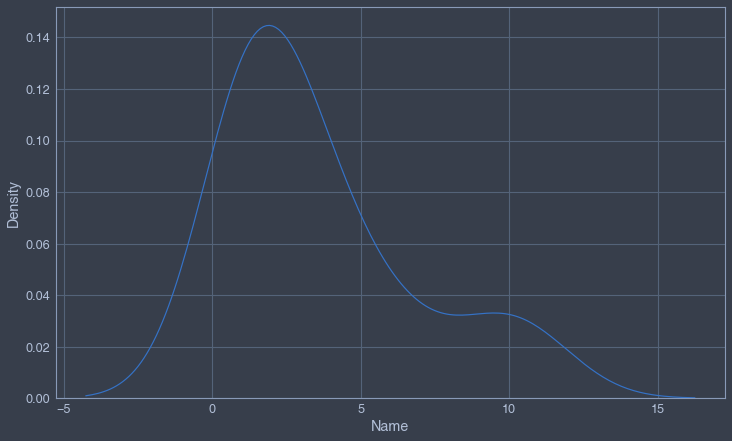

In [64]:
sns.kdeplot(data=unid_proven_victims_count, x='Name')

In [76]:
unid_region = us_sk_unid.groupby('Region where active').count()
unid_region = unid_region.reset_index()

<AxesSubplot:xlabel='Name', ylabel='Region where active'>

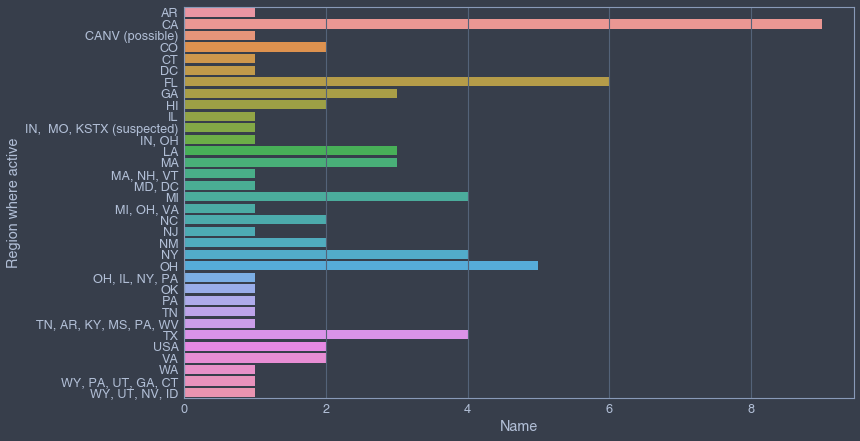

In [78]:
sns.barplot(data=unid_region, y='Region where active', x='Name')

In [79]:
us_sk_unid[us_sk_unid['Region where active']=='FL']

,Name,Years active,Proven Victims,Possible Victims,Region where active,Notes,Location,Start Year,Year End
28,Flat-Tire murders,1975–1976,12,35,FL,Killed young girls and women in Broward and Mi...,[],1975,1976
30,Fort Myers Eight murders,Mid-1990s,8,8,FL,The remains of eight adult men discovered murd...,"[[Florida, Fort Myers]]",Mid-1990s,NaN
33,Gold Sock Killer,1973,3,3,FL,Strangled a woman and two teenage girls to dea...,[],1973,NaN
37,Hog Trail Murders,1993–1996,6,12,FL,Mutilated bodies of young men found in Charlot...,"[[Florida, ]]",1993,1996
50,Miami Strangler,1964–1970,9,11,FL,"Murdered at least nine women in Miami, Florida...","[[Florida, Miami]]",1964,1970
63,South Florida serial murders,1997–2001,3,10+,FL,"Murdered women, most of whom were homeless or ...",[],1997,2001


In [15]:
us_sk_unid[us_sk_unid['Region where active']=='CA']

,Name,Years active,Proven Victims,Possible Victims,Region where active,Notes,Location,Start Year,Year End
10,Bouncing Ball Killer,1959–1960,6,7+,CA,Series of murders targeted towards elderly wom...,[],1959,1960
24,Doodler,1974–1975,6,16,CA,Sketched then stabbed to death gay men in San ...,"[[California, San Francisco]]",1974,1975
36,Gypsy Hill killings,1976,5,5+,CA,"Known as the ""San Mateo slasher""; five unsolve...","[[California, San Mateo]]",1976,NaN
38,Harbor City serial shootings,1993,3,3,CA,"Shot four black men from his Jeep, three of th...",[],1993,NaN
56,Pittsburg serial murders,1998–1999,5,5,CA,Single or multiple offenders who murdered one ...,"[[California, ]]",1998,1999
59,San Diego serial murders,1985–1990,43,43+,CA,"Murders of women, predominantly prostitutes an...",[],1985,1990
60,Santa Rosa hitchhiker murders,1972–1973,7,7+,CA,A series of at least seven unsolved homicides ...,"[[California, Sonoma]]",1972,1973
62,Skid Row Stabber,1978–1979,11,11,CA,Murdered homeless men in Los Angeles' Skid Row...,[],1978,1979
66,Stockton serial shootings,2021–2022,6,7+,CA,Shot one man to death in Oakland and five in S...,[],2021,2022


In [51]:
us_sk_id['Start Year INT'] = pd.to_numeric(us_sk_id['Start Year'], errors='coerce', downcast='integer')
us_sk_id['Year End INT'] = pd.to_numeric(us_sk_id['Year End'], errors='coerce', downcast='integer')

In [33]:
us_sk_unid['Start Year INT'] = pd.to_numeric(us_sk_unid['Start Year'], errors='coerce', downcast='integer')
us_sk_unid['Year End INT'] = pd.to_numeric(us_sk_unid['Year End'], errors='coerce', downcast='integer')

In [53]:
start_year_victims = us_sk_unid.groupby('Start Year INT').sum()['Proven Victims'].reset_index()
id_start_year_victims = us_sk_id.groupby('Start Year INT').sum()['Proven Victims INT'].reset_index()

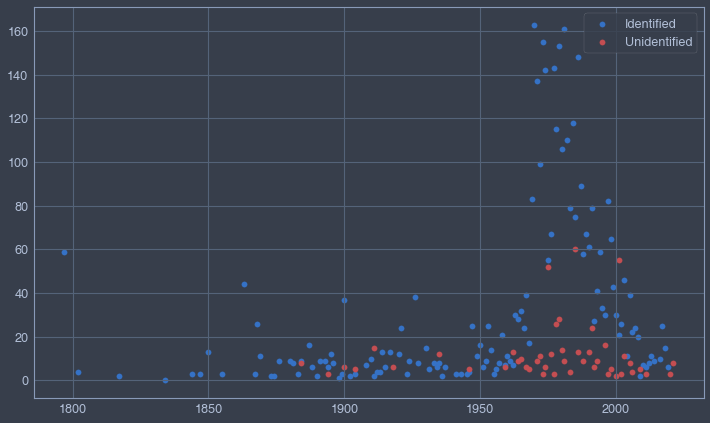

In [62]:
plt.scatter(id_start_year_victims['Start Year INT'], id_start_year_victims['Proven Victims INT'], label='Identified')
plt.scatter(start_year_victims['Start Year INT'], start_year_victims['Proven Victims'], c='r', label='Unidentified')
plt.legend()

In [35]:
us_sk_unid

,Name,Years active,Proven Victims,Possible Victims,Region where active,Notes,Location,Start Year,Year End,Start Year INT,Year End INT
0,Albuquerque serial killer,2021–2022,2,4,NM,Suspected of killing four Muslim men in drive-...,[],2021,2022,2021.0,2022.0
1,Alphabet murders,1971–1973,3,3,NY,"Also known as the ""Double Initial Murders""; mu...","[[New York, Rochester]]",1971,1973,1971.0,1973.0
2,Ann Arbor Hospital murders,1975,10,10,MI,Poisonings of 10 patients at the Veteran's Adm...,[],1975,NaN,1975.0,NaN
3,Atlanta child murders,1979–1981,28,30,GA,"A series of murders committed in Atlanta, Geor...","[[Georgia, Atlanta]]",1979,1981,1979.0,1981.0
4,Atlanta Lover's Lane Murders,1977,3,3,GA,A series of unsolved shootings on couples in A...,[],1977,NaN,1977.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
67,Suitland murders,1986–1987,5,9,"MD, DC","Abducted, raped and stabbed to death women aro...","[[Maryland, ]]",1986,1987,1986.0,1987.0
68,Texas Killing Fields,1970s–2000s,4,30+,TX,"Since the early 1970s, roughly 30 bodies have ...",[],1970s,2000s,NaN,NaN
69,Tube Sock Killings,1985,4,6,WA,Unsolved murders which occurred in the remote ...,"[[Washington, ]]",1985,NaN,1985.0,NaN
70,West Mesa murders,2003–2009,11,11+,NM,"Remains of 11 women, who disappeared between 2...","[[New Mexico, Albuquerque]]",2003,2009,2003.0,2009.0


In [37]:
us_sk_unid[us_sk_unid['Proven Victims']>10]

,Name,Years active,Proven Victims,Possible Victims,Region where active,Notes,Location,Start Year,Year End,Start Year INT,Year End INT
3,Atlanta child murders,1979–1981,28,30,GA,"A series of murders committed in Atlanta, Geor...","[[Georgia, Atlanta]]",1979,1981,1979.0,1981.0
5,Atlanta Ripper,1911,15,15–21,GA,Mystery murderer(s) of 15 Atlanta women in 1911,[],1911,NaN,1911.0,NaN
9,Boston Strangler,1962–1964,13,13,MA,"1960s deaths of 13 women (five young, eight ol...",[],1962,1964,1962.0,1964.0
14,Chicago Strangler,2001–2021,55,75+,IL,Raped and strangled predominantly African-Amer...,[],2001,2021,2001.0,2021.0
16,Cleveland Torso Murderer,1935–1938,12,40+,OH,"Also known as the ""Mad Butcher of Kingsbury Ru...","[[Ohio, Cleveland]]",1935,1938,1935.0,1938.0
22,Denver Prostitute Killer,1975–1995,17,27,CO,"Abducted, raped and strangled young girls and ...",[],1975,1995,1975.0,1995.0
28,Flat-Tire murders,1975–1976,12,35,FL,Killed young girls and women in Broward and Mi...,[],1975,1976,1975.0,1976.0
34,Golden Years Murders,1990–1996,13,13+,VA,"Murders of elderly women in Richmond, Virginia...","[[Virginia, Richmond]]",1990,1996,1990.0,1996.0
42,I-70 Strangler,1980–1991,12,12,"IN, OH",Killed gay men and dumped their bodies near I-...,[],1980,1991,1980.0,1991.0
59,San Diego serial murders,1985–1990,43,43+,CA,"Murders of women, predominantly prostitutes an...",[],1985,1990,1985.0,1990.0


In [ ]:
status_label = [
    'Life imprisonment',
    'Suicide',
    'Died',
    'Murdered',
    'Execution',
    'Prison Term',
    'Unknown'
]